# Sample Kombinationen aus vollfaktoriellem Versuchsplan

In [1]:
import arrow
import os
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rc
rc('text', usetex=True)

## VP Phase I Modell 1

In [3]:
k_train = [5, 10, 20]
num_train = [32, 64, 128]
num_eval = [16, 32]
num_iter = [100, 300, 500]
optimizer = ['Adam', 'SGD']
meta_lr = [1e-3, 1e-2, 1e-1]
adaption_steps = [5, 10, 15]

In [4]:
vollfak_versuchsplan_phase_1_m1 = {
    'k_train': [],
    'num_train': [],
    'num_eval': [],
    'num_iter': [],
    'optimizer': [],
    'meta_lr': [],
    'adaption_steps': []
}

for i in itertools.product(k_train, num_train, num_eval, num_iter, optimizer, meta_lr, adaption_steps):
    vollfak_versuchsplan_phase_1_m1['k_train'].append(i[0])
    vollfak_versuchsplan_phase_1_m1['num_train'].append(i[1])
    vollfak_versuchsplan_phase_1_m1['num_eval'].append(i[2])
    vollfak_versuchsplan_phase_1_m1['num_iter'].append(i[3])
    vollfak_versuchsplan_phase_1_m1['optimizer'].append(i[4])
    vollfak_versuchsplan_phase_1_m1['meta_lr'].append(i[5])
    vollfak_versuchsplan_phase_1_m1['adaption_steps'].append(i[6])


In [5]:
df_versuchsplan_phase1_m1 = pd.DataFrame(vollfak_versuchsplan_phase_1_m1)

In [6]:
len(df_versuchsplan_phase1_m1)

972

In [7]:
df_versuchsplan_phase1_m1.head()

,k_train,num_train,num_eval,num_iter,optimizer,meta_lr,adaption_steps
0,5,32,16,100,Adam,0.001,5
1,5,32,16,100,Adam,0.001,10
2,5,32,16,100,Adam,0.001,15
3,5,32,16,100,Adam,0.010,5
4,5,32,16,100,Adam,0.010,10


In [68]:
fn = '{}_vollfaktorieller_versuchsplan_phase_1_m1.csv'.format(arrow.now().format('YYYYMMDD'))
full_fn = os.path.join(os.getcwd(), 'exp_data', fn)
print(full_fn)
df_versuchsplan_phase1_m1.to_csv(full_fn, sep=';')

/home/torge/dev/masterthesis_code/02_Experimente/03_Experimente/exp_data/20200407_vollfaktorieller_versuchsplan.csv


In [46]:
sample_prct = 10
num_to_sample = int(len(df_versuchsplan_phase1_m1) / 100 * sample_prct)

In [61]:
sampled_versuchsplan_p1_m1 = df_versuchsplan_phase1_m1.sample(num_to_sample)

In [67]:
fn = '{}_teilfaktorieller_versuchsplan_gesampelt.csv'.format(arrow.now().format('YYYYMMDD'))
full_fn = os.path.join(os.getcwd(), 'exp_data', fn)
print(full_fn)
sampled_versuchsplan.to_csv(full_fn, sep=';', index=False)

/home/torge/dev/masterthesis_code/02_Experimente/03_Experimente/exp_data/20200407_teilfaktorieller_versuchsplan_gesampelt.csv


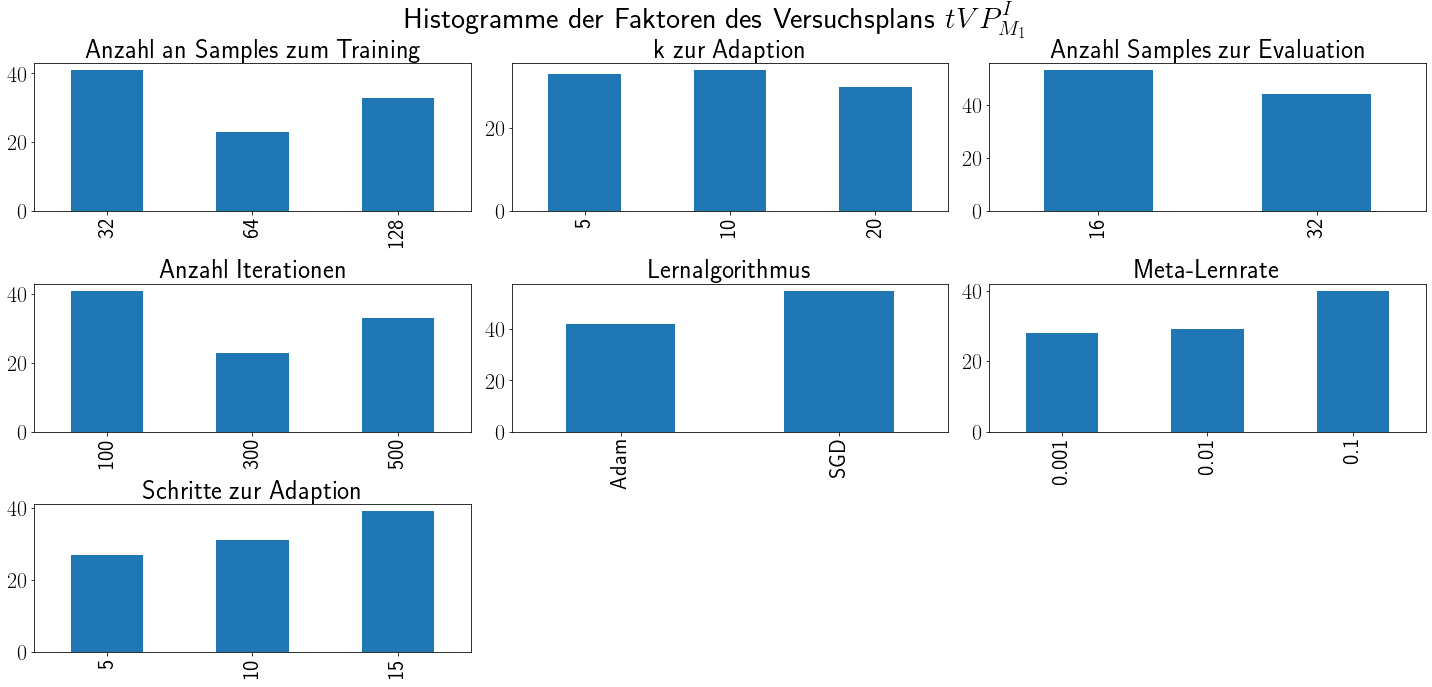

In [185]:
fig, ax= plt.subplots(3,3, figsize=(20,10))

sampled_versuchsplan['num_train'].value_counts().sort_index().plot.bar(ax=ax[0][0])
ax[0][0].set_title('Anzahl an Samples zum Training',fontsize=26)
ax[0][0].tick_params(axis='both', which='major', labelsize=22)

sampled_versuchsplan['k_train'].value_counts().sort_index().plot.bar(ax=ax[0][1])
ax[0][1].set_title('k zur Adaption',fontsize=26)
ax[0][1].tick_params(axis='both', which='major', labelsize=22)

sampled_versuchsplan['num_eval'].value_counts().sort_index().plot.bar(ax=ax[0][2])
ax[0][2].set_title('Anzahl Samples zur Evaluation',fontsize=26)
ax[0][2].tick_params(axis='both', which='major', labelsize=22)

sampled_versuchsplan['num_iter'].value_counts().sort_index().plot.bar(ax=ax[1][0])
ax[1][0].set_title('Anzahl Iterationen',fontsize=26)
ax[1][0].tick_params(axis='both', which='major', labelsize=22)

sampled_versuchsplan['optimizer'].value_counts().sort_index().plot.bar(ax=ax[1][1])
ax[1][1].set_title('Lernalgorithmus',fontsize=26)
ax[1][1].tick_params(axis='both', which='major', labelsize=22)

sampled_versuchsplan['meta_lr'].value_counts().sort_index().plot.bar(ax=ax[1][2])
ax[1][2].set_title('Meta-Lernrate',fontsize=26)
ax[1][2].tick_params(axis='both', which='major', labelsize=22)

sampled_versuchsplan['adaption_steps'].value_counts().sort_index().plot.bar(ax=ax[2][0])
ax[2][0].set_title('Schritte zur Adaption',fontsize=26)
ax[2][0].tick_params(axis='both', which='major', labelsize=22)

ax[2][1].axis('off')
ax[2][2].axis('off')

fig.suptitle('Histogramme der Faktoren des Versuchsplans  $\displaystyle tVP^{I}_{M_1}$', fontsize=30)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

save = True
if save:
    fn = os.path.join(os.getcwd(), 'figs', '{}_histogramm_sampled_versuchsplan.pdf'.format(arrow.now().format('YYYYMMDD')))
    fig.savefig(fn, bbox_inches='tight', pad_inches=0)

## VP Phase II Modell 1

In [3]:
k_train = [5, 10, 20]
optimizer = ['Adam', 'SGD']
num_iter = [1, 64, 128]
lr = [0.001, 0.01, 0.1]
filter_cde = [(1,), (2,), (3,), (1, 2), (1, 3), (2, 3), (1, 2, 3)]
model_n = [1,2,3,4,5,6]

In [4]:
vollfak_versuchsplan_phase2_m1 = {
    'k_train': [],
    'optimizer': [],
    'num_iter': [],
    'lr': [],
    'filter_cde': [],
    'model': []
}

for i in itertools.product(k_train, optimizer, num_iter, lr, filter_cde, model_n):
    vollfak_versuchsplan_phase2_m1['k_train'].append(i[0])
    vollfak_versuchsplan_phase2_m1['optimizer'].append(i[1])
    vollfak_versuchsplan_phase2_m1['num_iter'].append(i[2])
    vollfak_versuchsplan_phase2_m1['lr'].append(i[3])
    vollfak_versuchsplan_phase2_m1['filter_cde'].append(i[4])
    vollfak_versuchsplan_phase2_m1['model'].append(i[5])


In [5]:
df_versuchsplan_phase_2_m1 = pd.DataFrame(vollfak_versuchsplan_phase2_m1)

In [6]:
fn = '{}_vollfaktorieller_versuchsplan_phase_2_m1.csv'.format(arrow.now().format('YYYYMMDD'))
full_fn = os.path.join(os.getcwd(), 'exp_data', fn)
print(full_fn)
df_versuchsplan_phase_2_m1.to_csv(full_fn, sep=';')

/home/torge/dev/masterthesis_code/02_Experimente/03_Experimente/exp_data/20200410_vollfaktorieller_versuchsplan_phase_2_m1.csv


In [7]:
sample_prct = 10
num_to_sample = int(len(df_versuchsplan_phase_2_m1) / 100 * sample_prct)

In [8]:
sampled_phase2_m1 = df_versuchsplan_phase_2_m1.sample(num_to_sample)

In [9]:
sampled_phase2_m1.head()

,k_train,optimizer,num_iter,lr,filter_cde,model
1793,20,Adam,128,0.001,"(1, 3)",6
238,5,Adam,64,0.100,"(1, 3)",5
1616,20,Adam,1,0.100,"(1, 2)",3
1598,20,Adam,1,0.100,"(1,)",3
950,10,Adam,64,0.010,"(1, 3)",3


In [28]:
sampled_phase2_m1.to_latex(longtable=True, index=False)

'\\begin{longtable}{rlrrlr}\n\\toprule\n k\\_train & optimizer &  num\\_iter &     lr & filter\\_cde &  model \\\\\n\\midrule\n\\endhead\n\\midrule\n\\multicolumn{6}{r}{{Continued on next page}} \\\\\n\\midrule\n\\endfoot\n\n\\bottomrule\n\\endlastfoot\n      20 &      Adam &       128 &  0.001 &     (1, 3) &      6 \\\\\n       5 &      Adam &        64 &  0.100 &     (1, 3) &      5 \\\\\n      20 &      Adam &         1 &  0.100 &     (1, 2) &      3 \\\\\n      20 &      Adam &         1 &  0.100 &       (1,) &      3 \\\\\n      10 &      Adam &        64 &  0.010 &     (1, 3) &      3 \\\\\n      10 &       SGD &       128 &  0.100 &     (2, 3) &      2 \\\\\n      20 &      Adam &         1 &  0.100 &  (1, 2, 3) &      5 \\\\\n       5 &       SGD &       128 &  0.010 &       (1,) &      3 \\\\\n      10 &      Adam &       128 &  0.100 &       (3,) &      6 \\\\\n       5 &      Adam &        64 &  0.100 &     (2, 3) &      6 \\\\\n       5 &      Adam &        64 &  0.010 &   

In [10]:
fn = '{}_teilfaktorieller_versuchsplan_phase2_m1.csv'.format(arrow.now().format('YYYYMMDD'))
full_fn = os.path.join(os.getcwd(), 'exp_data', fn)
print(full_fn)
sampled_phase2_m1.to_csv(full_fn, sep=';', index=False)

/home/torge/dev/masterthesis_code/02_Experimente/03_Experimente/exp_data/20200410_teilfaktorieller_versuchsplan_phase2_m1.csv


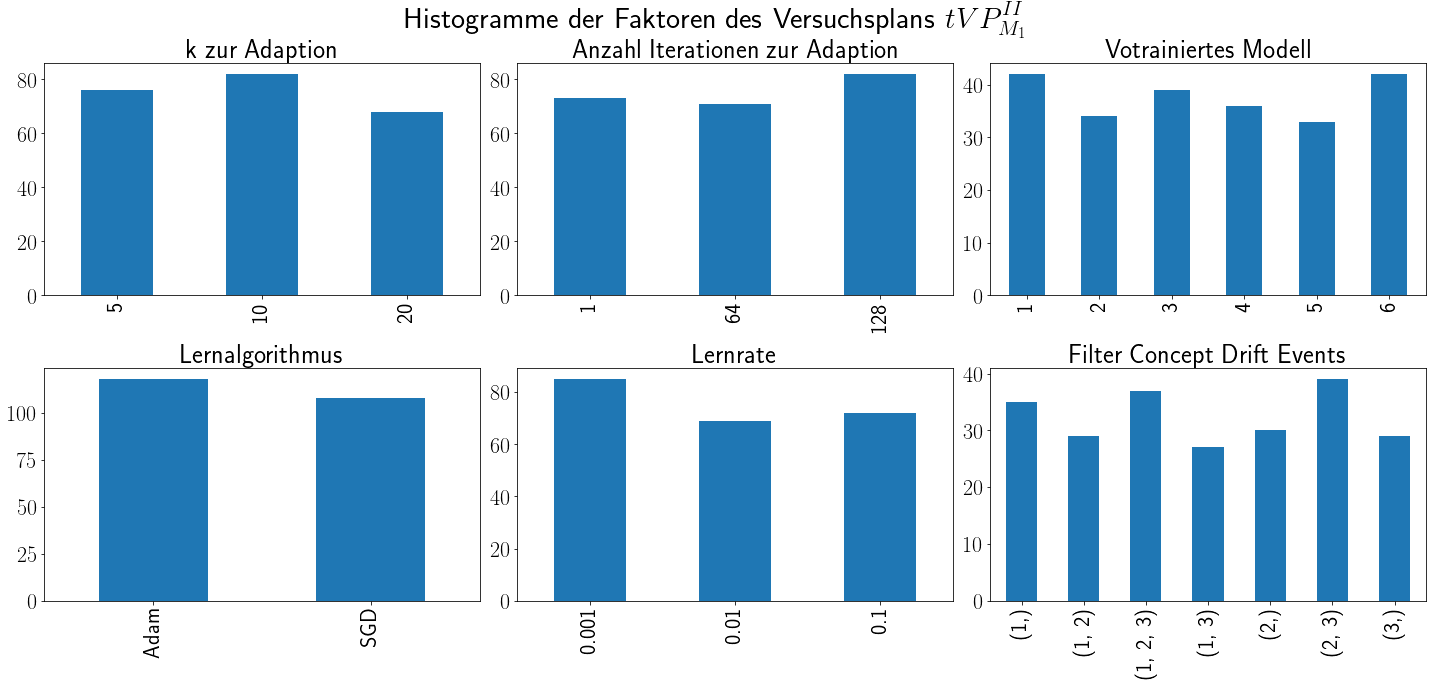

In [13]:
fig, ax= plt.subplots(2,3, figsize=(20,10))

sampled_phase2_m1['k_train'].value_counts().sort_index().plot.bar(ax=ax[0][0])
ax[0][0].set_title('k zur Adaption',fontsize=26)
ax[0][0].tick_params(axis='both', which='major', labelsize=22)

sampled_phase2_m1['num_iter'].value_counts().sort_index().plot.bar(ax=ax[0][1])
ax[0][1].set_title('Anzahl Iterationen zur Adaption',fontsize=26)
ax[0][1].tick_params(axis='both', which='major', labelsize=22)

sampled_phase2_m1['model'].value_counts().sort_index().plot.bar(ax=ax[0][2])
ax[0][2].set_title('Votrainiertes Modell',fontsize=26)
ax[0][2].tick_params(axis='both', which='major', labelsize=22)

sampled_phase2_m1['optimizer'].value_counts().sort_index().plot.bar(ax=ax[1][0])
ax[1][0].set_title('Lernalgorithmus',fontsize=26)
ax[1][0].tick_params(axis='both', which='major', labelsize=22)

sampled_phase2_m1['lr'].value_counts().sort_index().plot.bar(ax=ax[1][1])
ax[1][1].set_title('Lernrate',fontsize=26)
ax[1][1].tick_params(axis='both', which='major', labelsize=22)

sampled_phase2_m1['filter_cde'].value_counts().sort_index().plot.bar(ax=ax[1][2])
ax[1][2].set_title('Filter Concept Drift Events',fontsize=26)
ax[1][2].tick_params(axis='both', which='major', labelsize=22)

fig.suptitle('Histogramme der Faktoren des Versuchsplans  $\displaystyle tVP^{II}_{M_1}$', fontsize=30)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

save = True
if save:
    fn = os.path.join(os.getcwd(), 'figs', '{}_histogramm_sampled_versuchsplan_phase2_m1.pdf'.format(arrow.now().format('YYYYMMDD')))
    fig.savefig(fn, bbox_inches='tight', pad_inches=0)

## VP Phase II Modell 2

In [17]:
k_train = [5, 10, 20]
optimizer = ['Adam', 'SGD']
num_iter = [1, 64, 128]
lr = [0.001, 0.01, 0.1]
filter_cde = [(1,), (2,), (3,), (1, 2), (1, 3), (2, 3), (1, 2, 3)]

In [14]:
vollfak_versuchsplan_phase2_m2 = {
    'k_train': [],
    'optimizer': [],
    'num_iter': [],
    'lr': [],
    'filter_cde': [],
}

for i in itertools.product(k_train, optimizer, num_iter, lr, filter_cde):
    vollfak_versuchsplan_phase2_m2['k_train'].append(i[0])
    vollfak_versuchsplan_phase2_m2['optimizer'].append(i[1])
    vollfak_versuchsplan_phase2_m2['num_iter'].append(i[2])
    vollfak_versuchsplan_phase2_m2['lr'].append(i[3])
    vollfak_versuchsplan_phase2_m2['filter_cde'].append(i[4])


In [15]:
df_versuchsplan_phase_2_m2 = pd.DataFrame(vollfak_versuchsplan_phase2_m2)

In [16]:
fn = '{}_vollfaktorieller_versuchsplan_phase_2_m2.csv'.format(arrow.now().format('YYYYMMDD'))
full_fn = os.path.join(os.getcwd(), 'exp_data', fn)
print(full_fn)
df_versuchsplan_phase_2_m2.to_csv(full_fn, sep=';')

/home/torge/dev/masterthesis_code/02_Experimente/03_Experimente/exp_data/20200410_vollfaktorieller_versuchsplan_phase_2_m2.csv


In [17]:
sample_prct = 10
num_to_sample = int(len(df_versuchsplan_phase_2_m2) / 100 * sample_prct)

In [18]:
sampled_phase2_m2 = df_versuchsplan_phase_2_m2.sample(num_to_sample)

In [23]:
sampled_phase2_m2.head()

,k_train,optimizer,num_iter,lr,filter_cde
49,5,Adam,128,0.01,"(1,)"
265,20,Adam,1,0.01,"(1, 2, 3)"
369,20,SGD,128,0.01,"(2, 3)"
81,5,SGD,1,0.10,"(1, 3)"
133,10,Adam,1,0.01,"(1,)"


In [20]:
fn = '{}_teilfaktorieller_versuchsplan_phase2_m2.csv'.format(arrow.now().format('YYYYMMDD'))
full_fn = os.path.join(os.getcwd(), 'exp_data', fn)
print(full_fn)
sampled_phase2_m2.to_csv(full_fn, sep=';', index=False)

/home/torge/dev/masterthesis_code/02_Experimente/03_Experimente/exp_data/20200410_teilfaktorieller_versuchsplan_phase2_m2.csv


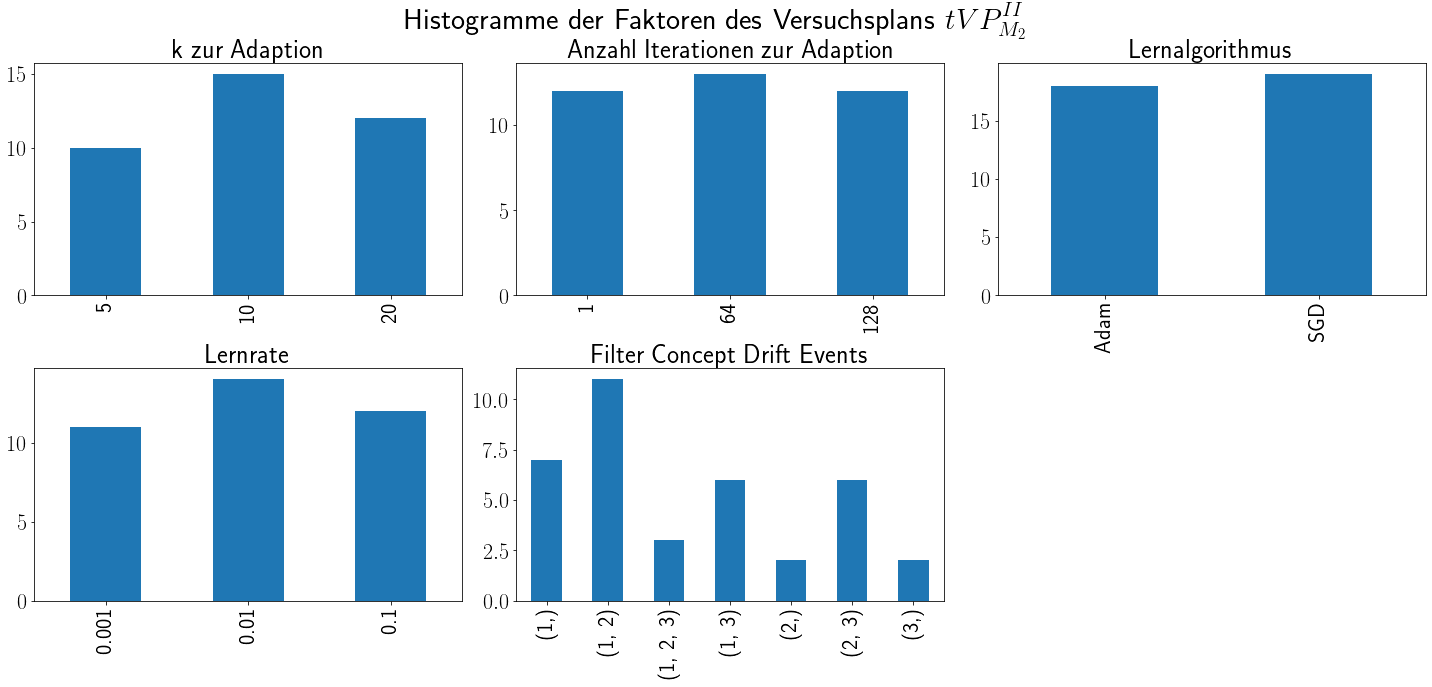

In [22]:
fig, ax= plt.subplots(2,3, figsize=(20,10))

sampled_phase2_m2['k_train'].value_counts().sort_index().plot.bar(ax=ax[0][0])
ax[0][0].set_title('k zur Adaption',fontsize=26)
ax[0][0].tick_params(axis='both', which='major', labelsize=22)

sampled_phase2_m2['num_iter'].value_counts().sort_index().plot.bar(ax=ax[0][1])
ax[0][1].set_title('Anzahl Iterationen zur Adaption',fontsize=26)
ax[0][1].tick_params(axis='both', which='major', labelsize=22)

sampled_phase2_m2['optimizer'].value_counts().sort_index().plot.bar(ax=ax[0][2])
ax[0][2].set_title('Lernalgorithmus',fontsize=26)
ax[0][2].tick_params(axis='both', which='major', labelsize=22)

sampled_phase2_m2['lr'].value_counts().sort_index().plot.bar(ax=ax[1][0])
ax[1][0].set_title('Lernrate',fontsize=26)
ax[1][0].tick_params(axis='both', which='major', labelsize=22)

sampled_phase2_m2['filter_cde'].value_counts().sort_index().plot.bar(ax=ax[1][1])
ax[1][1].set_title('Filter Concept Drift Events',fontsize=26)
ax[1][1].tick_params(axis='both', which='major', labelsize=22)

ax[1][2].axis('off')


fig.suptitle('Histogramme der Faktoren des Versuchsplans  $\displaystyle tVP^{II}_{M_2}$', fontsize=30)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])


save = True
if save:
    fn = os.path.join(os.getcwd(), 'figs', '{}_histogramm_sampled_versuchsplan_phase2_m2.pdf'.format(arrow.now().format('YYYYMMDD')))
    fig.savefig(fn, bbox_inches='tight', pad_inches=0)

# Spielwiese

In [114]:
import numpy as np
import matplotlib.pyplot as plt

#makes a Latin Hyper Cube sample
#returns a matrix X of size n by p
#of a LHS of n values on each of p variables
#for each column of X, the n values are randomly
#distributed with one from each interval
#(0,1/n), (1/n,2/n), ..., (1-1/n,1)
#and they are randomly permuted

def lhssample(n=10,p=4):
    x = np.random.uniform(size=[n,p])
    for i in range(0,p):
        x[:,i] = (np.argsort(x[:,i])+0.5)/n
    return x

x = lhssample(10,4)

In [121]:
import lhsmdu
import numpy as np

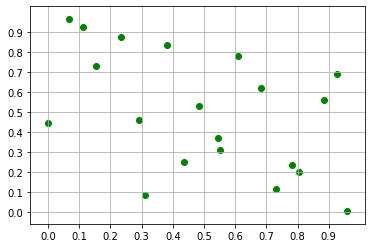

In [125]:
k = lhsmdu.sample(2, 20) # Latin Hypercube Sampling with multi-dimensional uniformity
k = np.array(k)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0,1,0.1))
ax.set_yticks(np.arange(0,1,0.1))
plt.scatter(k[0], k[1], color="g", label="LHS-MDU")
plt.grid()
plt.show()

In [128]:
k = lhsmdu.sample(3, 10) # Latin Hypercube Sampling with multi-dimensional uniformity

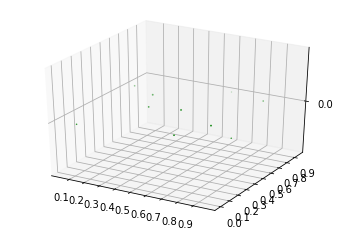

In [134]:
k = np.array(k)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xticks(np.arange(0,1,0.1))
ax.set_yticks(np.arange(0,1,0.1))
ax.set_zticks(np.arange(0,1,0.1))
plt.scatter(k[0], k[1], k[2], color="g", label="LHS-MDU")
plt.grid()
plt.show()

In [135]:
k2 = lhsmdu.sample(8, 10) # Latin Hypercube Sampling with multi-dimensional uniformity

In [136]:
k2

matrix([[0.31031239, 0.89025529, 0.25052524, 0.58264575, 0.03200496,
         0.48955232, 0.93892017, 0.10108377, 0.6905382 , 0.70912867],
        [0.43193136, 0.6950062 , 0.39506071, 0.85734379, 0.76318372,
         0.94484455, 0.22932108, 0.53286645, 0.16725185, 0.07523745],
        [0.0791579 , 0.97896181, 0.40912061, 0.14944203, 0.60575588,
         0.35495289, 0.54415305, 0.28877042, 0.7350915 , 0.8117067 ],
        [0.81429917, 0.17615106, 0.46182181, 0.71011227, 0.90841068,
         0.37009691, 0.5072763 , 0.68218601, 0.07062422, 0.20813488],
        [0.40848377, 0.39866396, 0.13742708, 0.73706421, 0.68127996,
         0.29472486, 0.09860011, 0.97533782, 0.83762596, 0.50835007],
        [0.87771469, 0.65584042, 0.2424222 , 0.09063544, 0.91111975,
         0.44926251, 0.70113536, 0.54686606, 0.10563033, 0.31188179],
        [0.71175262, 0.06492103, 0.67460449, 0.85833688, 0.39621725,
         0.13748706, 0.52857121, 0.98685991, 0.22235958, 0.49632225],
        [0.30121545, 0.2969